In [1]:
reads ='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/03_filtering/reads12.tsv'

In [8]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads
reso=10000

IMP not found, check PYTHONPATH
/home/nikita/miniconda2/lib/python2.7/site-packages/pytadbit/__init__.py:126: UserWarning: IMP not found, check PYTHONPATH

  warn('IMP not found, check PYTHONPATH\n')


In [4]:
hic_data = load_hic_data_from_reads(reads,  reso)
matrix = hic_data.get_matrix(focus=None, diagonal=True, normalized=False)

### Coordinates of the deletion

In [6]:
beg, end = 500000 / reso, 600000  / reso

### Plot distribution of interactions from the diagonal (in red is the position of the deletion)

In [9]:
nrows = len(matrix)
new_matrix = []
for k, m in enumerate(matrix):
    line = m[k:] + m[0:k]
    new_matrix.append(list(np.array(line[0:nrows/2]) + np.array(line[-nrows/2+1:][::-1])))

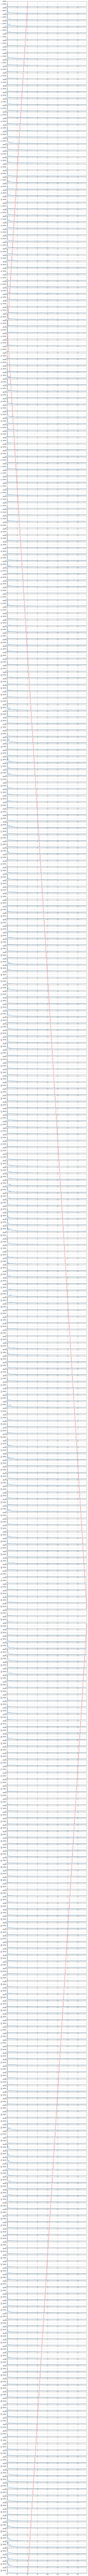

In [13]:
plt.figure(figsize=(12, 400))
for k in xrange(0, nrows):
    plt.subplot(nrows, 1, k + 1)
#     plt.plot(np.log2(new_matrix[k]), alpha=1)
    plt.plot(new_matrix[k], alpha=1)
    pos1 = min(abs(beg - k), min(k, beg) + (nrows - max(k, beg)))
    plt.fill_between([pos1, pos1 + 1], 0, 25000, alpha=0.3, color='red')
    plt.ylim(0, 20000)
    plt.xlim(0, nrows / 2)
    plt.grid()
    plt.ylabel(k)
plt.show()